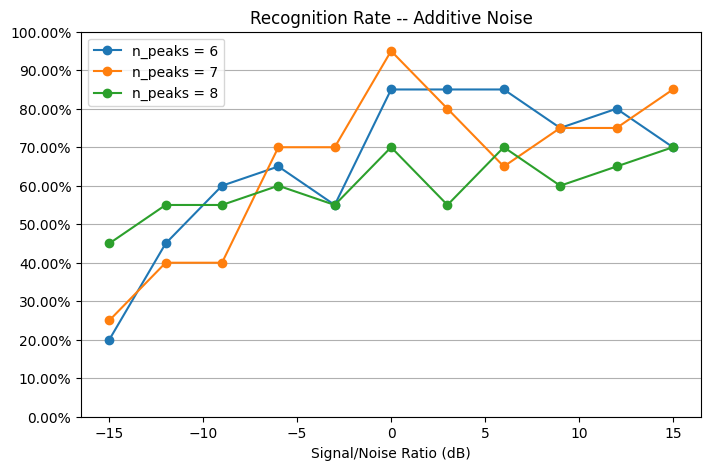

In [ ]:
#%pip install pydub
#import pandas as pd
import numpy as np
import grid_search_local as gs
from DBcontrol import init_db
import sqlite3
import matplotlib.pyplot as plt
from collections import defaultdict

grid_viewer = gs.GridViewer()
grid_viewer.from_sqlite("sql/week8_grid.db")

con = sqlite3.connect(grid_viewer.filename)
cur = con.cursor()
results_data = defaultdict(list)
for paramset_idx in (3, 7, 11):
    res = cur.execute(
        "SELECT snr, proportion_correct "
        "from results "
        "where paramset_idx = ? "
        "order by snr", (paramset_idx,)
        ).fetchall()
    results_data[paramset_idx] = res  # list of (x,y) pairs

# map paramset_idx to a particular value
# example: modifying candidates_per_band
# obtain via sql query holding all else equal:
# sqlite> select * from paramsets where cm_window_size = 10 and fanout_t = 200 and fanout_f = 2000 and paramset_idx not in (select paramset_idx from errors);
lookup_table_params = {
    3:6, 7:7, 11:8, 15:9  # paramset_idx:candidates_per_band parameter
}
plt.figure(figsize=(8, 5))
for key, pairs in results_data.items():
    pairs_sorted = sorted(pairs, key=lambda p: p[0])
    xs = [p[0] for p in pairs_sorted]
    ys = [p[1] for p in pairs_sorted]
    plt.plot(xs, ys, marker='o', label=f'n_peaks = {lookup_table_params[key]}')

yticks = np.arange(0.0, 1.01, 0.1)
plt.yticks(yticks, [f"{v:.2%}" for v in yticks])
plt.grid(axis='x', visible=False)
plt.grid(axis='y', linestyle='-', linewidth=0.8)

plt.xlabel('Signal/Noise Ratio (dB)')
plt.title('Recognition Rate -- Additive Noise')
plt.legend()
plt.ylim(0, 1)
plt.show()